In [1]:
import sys
import random

import matplotlib.pyplot as plt

sys.path.append("..")

In [2]:
from python.WGraD.tools import *
from python.WGraD.WGraD import WGraD, ClusterResult
from python.fitness.cec2013.cec2013.cec2013 import CEC2013

In [3]:
fun_id = 5
f = CEC2013(fun_id)
fitness_func = f.evaluate
dimension = f.get_dimension()

lb = f.get_lbound(dimension - 1)
ub = f.get_ubound(dimension - 1)


num_samples = 500

plot test function

Text(0.5, 0.92, '3D Surface Plot')

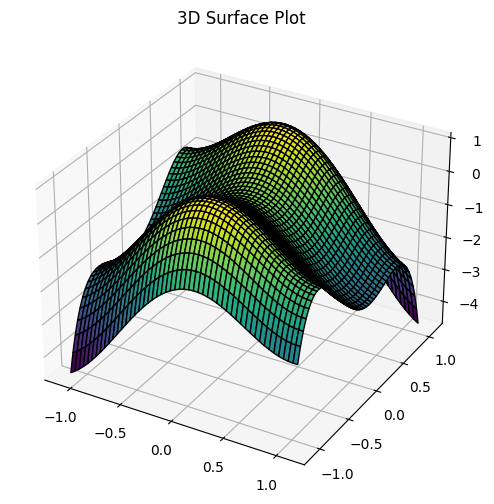

In [4]:
n = 1000
X_1 = np.linspace(lb, ub, n).reshape((n, 1))
Y_1 = np.linspace(lb, ub, n).reshape((n, 1))
X_1, Y_1 = np.meshgrid(X_1, Y_1)

Z_1 = np.zeros((n, n))
for i in range(n):
    for j in range(n):
        Z_1[i][j] = fitness_func(np.concatenate([[X_1[i][j]], [Y_1[i][j]]]))

# plot function
fig = plt.figure(figsize=(12, 6))
ax1 = fig.add_subplot(111, projection='3d')
ax1.plot_surface(X_1, Y_1, Z_1, cmap='viridis', edgecolor='k')
ax1.set_title('3D Surface Plot')

random sample

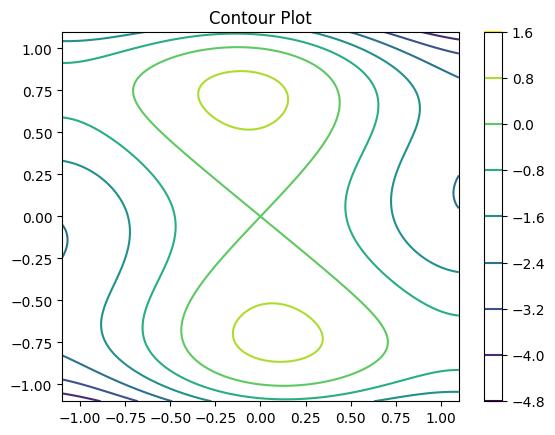

In [5]:
# plot contour
fig = plt.figure()
ax2 = fig.add_subplot(111)
contour_plot = ax2.contour(X_1, Y_1, Z_1, cmap='viridis')
ax2.set_title('Contour Plot')
plt.colorbar(contour_plot)


get samples

In [6]:
X_2 = lb + (ub - lb) * np.random.rand(num_samples, dimension)
Y_2 = np.zeros((num_samples, 1))
for i in range(num_samples):
    Y_2[i] = fitness_func(X_2[i, :])

In [7]:
wgrad = WGraD(X_2, Y_2, fitness_func=fitness_func)
cluster_result = wgrad.WGrad_2()
cluster_result

[<Cluster Result> 2 dimension 243 samples,
 <Cluster Result> 2 dimension 257 samples]

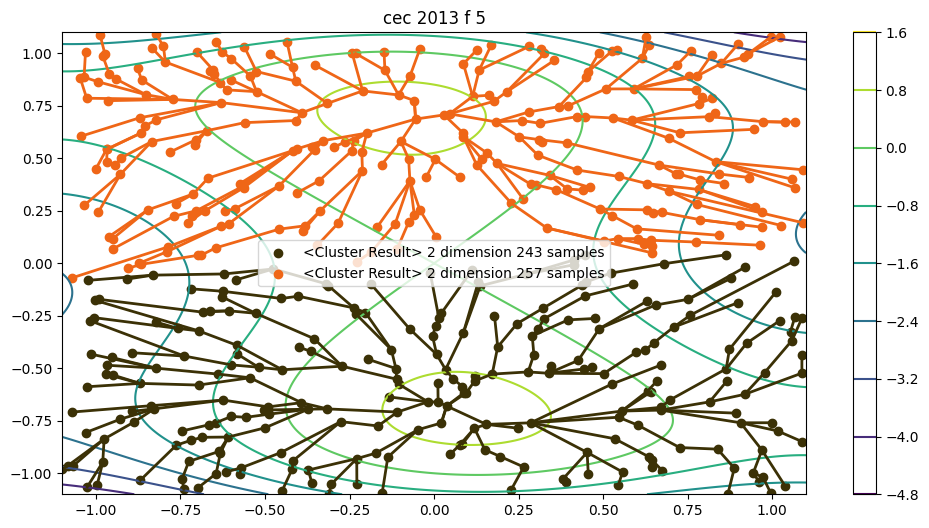

In [8]:
fig = plt.figure(figsize=(12, 6))
ax3 = fig.add_subplot(111)

contour_plot = ax3.contour(X_1, Y_1, Z_1, cmap='viridis')
ax3.set_title(f"cec 2013 f {fun_id}")
plt.colorbar(contour_plot)

for cluster in cluster_result:
    color = '#%02x%02x%02x' % (random.randint(0, 255), random.randint(0, 255), random.randint(0, 255))
    ax3.scatter(cluster.X[:, 0], cluster.X[:, 1], marker="o", color = color, label = f"{cluster}")
    tmp_edges = cluster.edges
    for point_a, point_b in tmp_edges:
        ax3.plot([point_a[0], point_b[0]], [point_a[1], point_b[1]], color=color, linestyle='-', linewidth=2)

plt.legend()
plt.show()